    
---

# North's energy balance model


<div class="alert alert-info"> 
    

### Introduction


This week, we will work with the energy balance by North (1975). 
    
The model is similar to the model by Budyko (1969), except for the form of the meriodional heat transport term. Here, the meriodional transport is characterized by a thermal diffusion. The diffusion coefficient does not depend on the climate itself. By adjusting this parameter, the model can succesfully fit the present climate. 

Another difference is that the variable used to describe the latitudinal dependence is $x=sin(\varphi)$. This is the natural variable, because it weights the area of each latitude band. 
    
The exercise consists of three parts: 
    
**Part 1**: We will investigate a mean annual version of the model. As in Budyko's model, we need to iterate to obtain the correct meridional heat transport. Here, the iteration is formulated as a time evolution. 

**Part 2**: We will investigate the seasonal insolation variation.

**Part 3**: We will develop the North model to include seasonal variations, by combining the part 1+2 scripts. 

In each part, we will investigate how the model parameters affect the simulated temperatures, and use the model to study some scenarios. The focus is on understanding each parameter, and to investigate climate feedbacks and sensitivity. In parts 1 and 2, the code will be provided, and we will perform experiments with various modified parameters.   

</div>

---

# PART 2. Investigate the seasonal insolation:


The script below calculates the seasonal variation of the insolation as a function of latitude and day of year for a given set of orbital parameters. 

The seasonal insolation is calculated for a set of orbital parameters, i.e. eccentricity, obliquity and precession. The orbital parameters are quantities that can be varied to investigate the seasons at different times in the past. 

The present-day values are:

- Eccentricity,  $\epsilon=0.01672$

- Obliquity, $\theta=23.44º$

- Precession, $\omega=102.07º$

For simplicity, we assume that the year has 360 days (the number of days is then equal to the 360 degrees for a full rotation).

The script is organized with a main program that defines the orbital parameters, calculates the insolation, and plots the results. The insolation is calculated by a function seasonal_insolation.


<div class="alert alert-success">
    
**Task 2.1**: Run the script with present-day orbital parameters to see the seasonal variation of insolation.

**Task 2.2**: Make a plot of the seasonal variation of insolation as a function of time at the Equator, 65ºN and 65ºS.

**Task 2.3**: Calculate the annual mean insolation as a function of x. Hint: insol is a 2D matrix with insolation as a function of latitude and day of year: insol[1..Nlat, 1..Ndays]. Use the function "np.mean" to calculate the annual mean value as a function of latitude, specify the axis. Look up the documentation to see the syntax.

**Task 2.4**: Make a plot where you compare the calculated annual mean with the analytical expression for mean insolation, $Q(x)$, used in week 1. The function to calculate $Q(x)$ is defined below. 

**Task 2.5**: You can investigate the effect of changing the orbital parameters. Try change the obliquity and the precession to see the effect of each of them. Compare with the figures in the textbook (figure 5.24, page 215). Make a plot to compare the seasonal variation of the insolation with changed orbital parameters and compare with the present conditions. You can plot both side by side, or plot the difference as a function of the day and the latitude, or plot the insolations at 65ºN for the two solutions.

**Task 2.6**: At the beginning of the Eemian interglacial, 130 kyears before present, the summer insolation at high latitudes was much higher than today. the orbital parameters at 130 kyr before present were: $\epsilon=0.039446$, $\theta=24.27º$, and $\omega=225.61º$. Plot the insolation with these values and check the peak insolation at 65ºN. How high was it?

</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

pi=np.pi
deg2rad=pi/180
rad2deg=1/deg2rad

In [2]:
def seasonal_insolation(Nlat,Ndays,L=1,S0=1353.0,obl=23.44,ecc=1.672e-02,long=102.07):

    # Some parameters:
    S=S0*L
    
    #define the latitude 
    xs= np.linspace(-1,1,Nlat)
    phis=np.arcsin(xs)*rad2deg
    #define the timestep arrays of the orbit 
    ts=np.arange(0,Ndays,1)
    #thetas=np.linspace(0,360,Ndays) #angular position around the orbit in degrees
    thetas=np.linspace(0,360-1,Ndays) #+(long-90)*360/Ndays #angular position around the orbit in degrees
    
    # calculate the temporal evolution of Earth's position
    distance = (1-ecc**2)/(1+ecc*np.cos(deg2rad*(thetas+450-long)))   #+450-long
    s_delt=-np.sin(deg2rad*obl)*np.cos(deg2rad*(thetas))
    c_delt=np.sqrt(1.0-s_delt**2)
    t_delt = s_delt/c_delt
    delt=np.arcsin(s_delt)*rad2deg
    
    # reset the insolation:
    wk=np.zeros((Nlat,Ndays))

    for i in range(Ndays):
        for j in range(Nlat):
            if delt[i]>0.0:
                if phis[j]>= 90 - delt[i]:
                    wk[j,i]= S*xs[j]*s_delt[i]/(distance[i]**2)
                elif ((-phis[j] >= (90 - delt[i])) & (phis[j]<0)):
                    wk[j,i] = 0
                else:
                    c_h0 = -np.tan(deg2rad*phis[j])*t_delt[i]
                    h0=np.arccos(c_h0)   
                    wk[j,i] = S*(h0*xs[j]*s_delt[i]+np.cos(deg2rad*phis[j])*c_delt[i]*np.sin(h0))/(pi*distance[i]**2)
            else:
                if phis[j] >= (90 +delt[i]):
                    wk[j,i]=0
                elif (-phis[j]>=(90+delt[i]) and (phis[j]<0)):
                    wk[j,i]=S*xs[j]*s_delt[i]/distance[i]**2
                else:
                    c_h0=-np.tan(deg2rad*phis[j])*t_delt[i]
                    h0 = np.arccos(c_h0)
                    wk[j,i] = S*(h0*xs[j]*s_delt[i]+np.cos(deg2rad*phis[j])*c_delt[i]*np.sin(h0))/(pi*distance[i]**2)
    
    return wk

In [3]:
def Q_lat(xs,L=1,S0=1354.0):    

    return  L*(S0/4)*(1 - 0.241*( 3*np.square(xs) - 1 ))
 

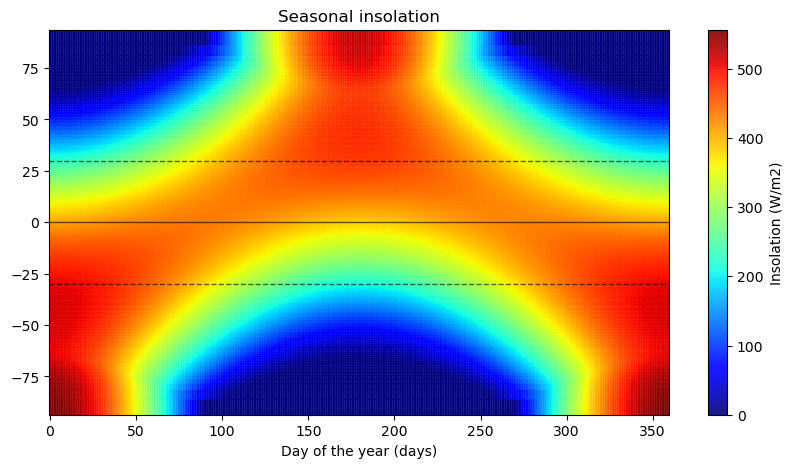

In [4]:
# This is the main script to calculate and plot the insolation:

# Define orbital parameters and the solar constant:
# present day orbital parameters are: 
obl  = 23.44
ecc  = 1.672e-02
long = 102.07

# present day solar constant is here assumed to be:
S0=1353.0 #W/m2 Q0=S0/4=338.5 W/m2, this is slightly lower than 1367/4=241 W/m2
L=1 # The ratio of S/S0, here set to 1

# Define the latitude variable
Nlat=251
xs= np.linspace(-1,1,Nlat)
phis=np.arcsin(xs)*rad2deg

# Define the temporal variable 
Ndays=360 # we use 360 days/yr for simplicity, i.e. 30 days/month
ts=np.arange(0,Ndays,1)

#calculate the variation
insol=seasonal_insolation(Nlat,Ndays,L,S0,obl,ecc,long)

#--------------------------plotting

fig, ax1 = plt.subplots(figsize=(10,5))
pcol=ax1.pcolor(ts,phis,insol,cmap='jet',alpha=0.9)
ax1.axhline(30,c='k',lw=1,ls='--',alpha=0.6)
ax1.axhline(-30,c='k',lw=1,ls='--',alpha=0.6)
ax1.axhline(0,c='k',lw=1,alpha=0.6)

ax1.set_xlabel('Day of the year (days)')
plt.colorbar(pcol,label='Insolation (W/m2)')
ax1.title.set_text('Seasonal insolation')


### Solution exercise 2.2:

125
239
65.78321658670754
11
-65.78321658670752


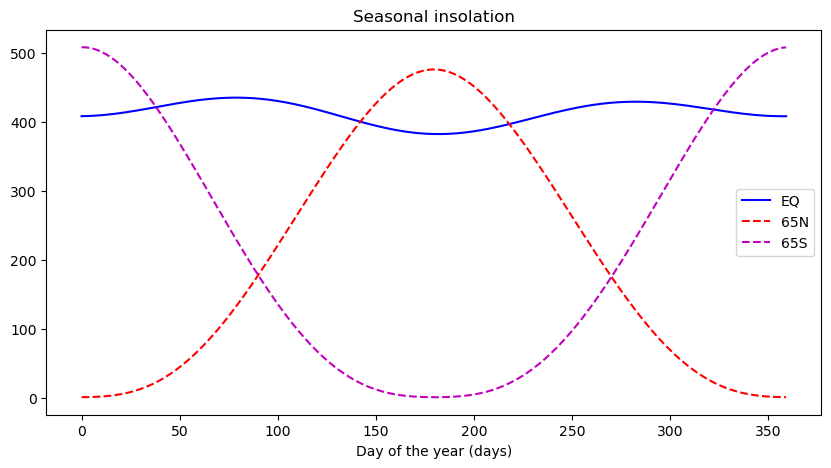

In [5]:
# Exercise 2.2: 
#Make a plot of the insolation as a function of time at the Equator, 65ºN and 65ºS.

#--------------------------plotting

indexEQ=math.floor(Nlat/2)
print(indexEQ) # check
index65N=math.floor(Nlat/2+np.sin(65*np.pi/180)/2*Nlat)
print(index65N) #check
print(phis[index65N]) #check
index65S=math.floor(Nlat/2-np.sin(65*np.pi/180)/2*Nlat)
print(index65S) #check
print(phis[index65S]) #check

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(ts,insol[indexEQ,:],'b',label='EQ')
ax1.plot(ts,insol[index65N,:],'r--',label='65N')
ax1.plot(ts,insol[index65S,:],'m--',label='65S')

ax1.set_xlabel('Day of the year (days)')
ax1.title.set_text('Seasonal insolation')
ax1.legend()

### Solution exercise 2.3 and 2.4:

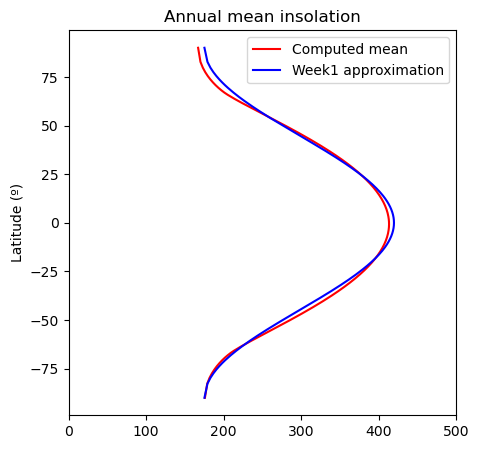

In [6]:
# Calculate the mean insolation and compare with the analytical expression and make a plot: 

#--------------------------plotting

fig, ax1 = plt.subplots(figsize=(5,5))

ax1.plot(np.mean(insol,axis=1), phis, 'r',label='Computed mean')
ax1.set_xlim(0,500)
ax1.title.set_text('Annual mean insolation')
ax1.set_ylabel('Latitude (º)')
ax1.plot(Q_lat(xs,L,S0),phis,'b',label='Week1 approximation')
ax1.legend()

### Solution exercise 2.5:

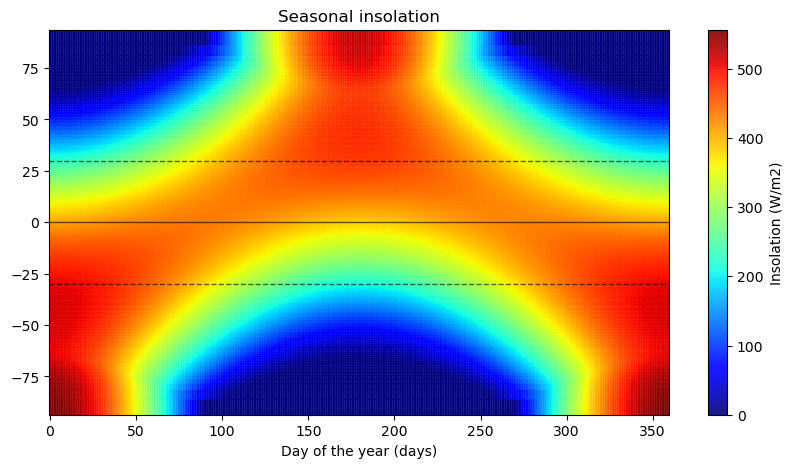

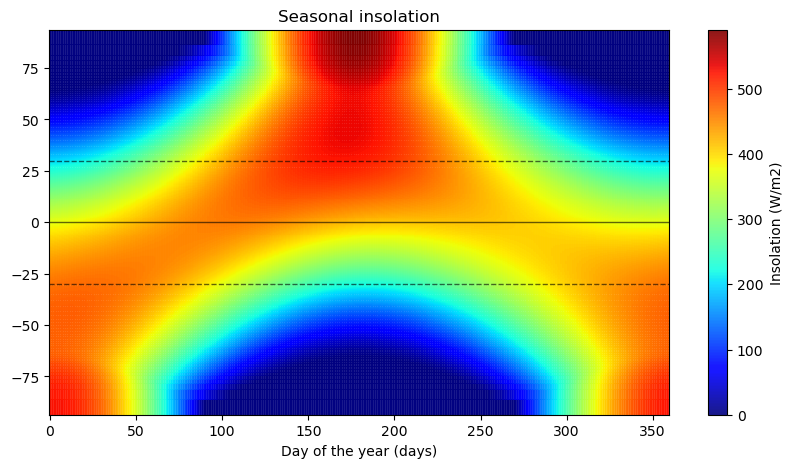

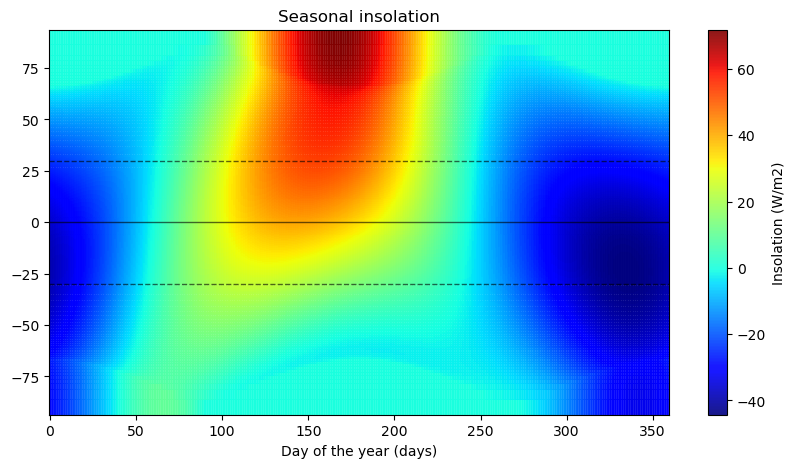

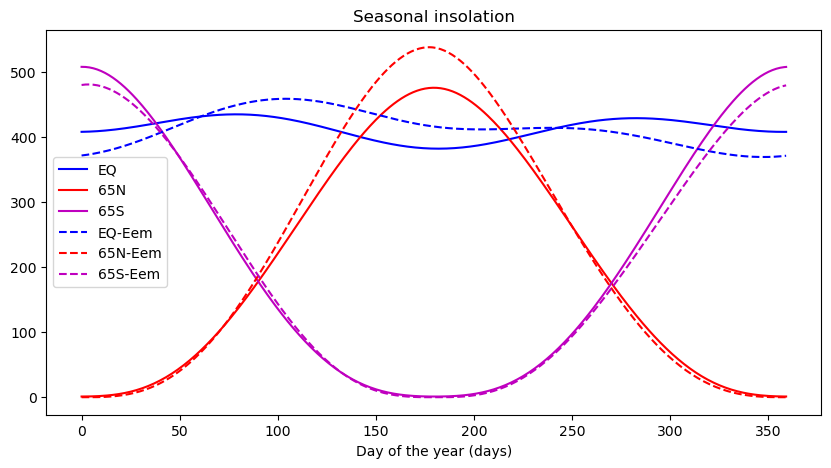

In [7]:
# First, we recalculate the insolation at present and under Eemian conditions using a precession of 90º
# Calculate the present day insolation:
#insol=seasonal_insolation(Nlat,Ndays,L,S0,obl,ecc,long)

# Calculate the insolation under Eemian conditions 
obl_old=24.27 #24.23 at 10 kyr BP #24.27 at 130 kyr BP
ecc_old=0.039446  #0.019425 at 10 kyr BP #0.039446 at 130 kyr BP
long_old=225.61 #179.056 at 10 kyr BP  #225.61 at 130 kyr BP #calculated from e*sin(lon)=prec
insol_old=seasonal_insolation(Nlat,Ndays,L,S0,obl_old,ecc_old,long_old)

# OBS problem - should be displaced so they both start at insolation min/max peak
insoldiff=insol_old-insol

#--------------------------plotting
fig, ax1 = plt.subplots(figsize=(10,5))
pcol=ax1.pcolor(ts,phis,insol,cmap='jet',alpha=0.9)
ax1.axhline(30,c='k',lw=1,ls='--',alpha=0.6)
ax1.axhline(-30,c='k',lw=1,ls='--',alpha=0.6)
ax1.axhline(0,c='k',lw=1,alpha=0.6)

ax1.set_xlabel('Day of the year (days)')
plt.colorbar(pcol,label='Insolation (W/m2)')
ax1.title.set_text('Seasonal insolation')

#--------------------------plotting
fig, ax1 = plt.subplots(figsize=(10,5))
pcol=ax1.pcolor(ts,phis,insol_old,cmap='jet',alpha=0.9)
ax1.axhline(30,c='k',lw=1,ls='--',alpha=0.6)
ax1.axhline(-30,c='k',lw=1,ls='--',alpha=0.6)
ax1.axhline(0,c='k',lw=1,alpha=0.6)

ax1.set_xlabel('Day of the year (days)')
plt.colorbar(pcol,label='Insolation (W/m2)')
ax1.title.set_text('Seasonal insolation')

#--------------------------plotting
fig, ax1 = plt.subplots(figsize=(10,5))
pcol=ax1.pcolor(ts,phis,insoldiff,cmap='jet',alpha=0.9)
ax1.axhline(30,c='k',lw=1,ls='--',alpha=0.6)
ax1.axhline(-30,c='k',lw=1,ls='--',alpha=0.6)
ax1.axhline(0,c='k',lw=1,alpha=0.6)

ax1.set_xlabel('Day of the year (days)')
plt.colorbar(pcol,label='Insolation (W/m2)')
ax1.title.set_text('Seasonal insolation')

#--------------------------plotting
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(ts,insol[indexEQ,:],'b',label='EQ')
ax1.plot(ts,insol[index65N,:],'r',label='65N')
ax1.plot(ts,insol[index65S,:],'m',label='65S')
ax1.plot(ts,insol_old[indexEQ,:],'b--',label='EQ-Eem')
ax1.plot(ts,insol_old[index65N,:],'r--',label='65N-Eem')
ax1.plot(ts,insol_old[index65S,:],'m--',label='65S-Eem')

ax1.set_xlabel('Day of the year (days)')
ax1.title.set_text('Seasonal insolation')
ax1.legend()
